In [1]:
from scipy.signal import lombscargle
from astropy.stats import LombScargle
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def cleanData(data):
    if(type(data['Time'][0]) == str):
        data['Time'] = data['Time'].str.strip()
        data['mx'] = data['mx'].str.strip()
        data['my'] = data['my'].str.strip()
        data['mz'] = data['mz'].str.strip()
        data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
        data['mx'] = pd.to_numeric(data['mx'], errors='coerce')
        data['my'] = pd.to_numeric(data['my'], errors='coerce')
        data['mz'] = pd.to_numeric(data['mz'], errors='coerce')
        data.dropna(inplace = True)
        data.sort_values('Time')


In [3]:
data800 = pd.read_csv("./data/pulse_DCField=800.csv")
data800 = data800[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data800.columns = ['Time', 'mx', 'my', 'mz']

data900 = pd.read_csv("./data/pulse_DCField=900.csv")
data900 = data900[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data900.columns = ['Time', 'mx', 'my', 'mz']

data1000 = pd.read_csv("./data/pulse_DCField=1000.csv")
data1000 = data1000[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data1000.columns = ['Time', 'mx', 'my', 'mz']

data1100 = pd.read_csv("./data/pulse_DCField=1100.csv")
data1100 = data1100[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data1100.columns = ['Time', 'mx', 'my', 'mz']

data1200 = pd.read_csv("./data/pulse_DCField=1200.csv")
data1200 = data1200[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data1200.columns = ['Time', 'mx', 'my', 'mz']

data1300 = pd.read_csv("./data/pulse_DCField=1300.csv")
data1300 = data1300[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data1300.columns = ['Time', 'mx', 'my', 'mz']

data1400 = pd.read_csv("./data/pulse_DCField=1400.csv")
data1400 = data1400[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data1400.columns = ['Time', 'mx', 'my', 'mz']

data1500 = pd.read_csv("./data/pulse_DCField=1500.csv")
data1500 = data1500[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data1500.columns = ['Time', 'mx', 'my', 'mz']

data1600 = pd.read_csv("./data/pulse_DCField=1600.csv")
data1600 = data1600[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data1600.columns = ['Time', 'mx', 'my', 'mz']

cleanData(data800)
cleanData(data900)
cleanData(data1000)
cleanData(data1100)
cleanData(data1200)
cleanData(data1300)
cleanData(data1400)
cleanData(data1500)
cleanData(data1500)

In [5]:
data800.to_csv('DCField800.csv', index = False)
data900.to_csv('DCField900.csv', index = False)
data1000.to_csv('DCField1000.csv', index = False)
data1100.to_csv('DCField1100.csv', index = False)
data1200.to_csv('DCField1200.csv', index = False)
data1300.to_csv('DCField1300.csv', index = False)
data1400.to_csv('DCField1400.csv', index = False)
data1500.to_csv('DCField1500.csv', index = False)
data1600.to_csv('DCField1600.csv', index = False)

In [26]:
frequency800, power800 = LombScargle(np.array(data800['Time']), np.array(data800['mx'])).autopower()
frequency900, power900 = LombScargle(np.array(data900['Time']), np.array(data900['mx'])).autopower()
frequency1000, power1000 = LombScargle(np.array(data1000['Time']), np.array(data1000['mx'])).autopower()
frequency1100, power1100 = LombScargle(np.array(data1100['Time']), np.array(data1100['mx'])).autopower()
frequency1200, power1200 = LombScargle(np.array(data1200['Time']), np.array(data1200['mx'])).autopower()
frequency1300, power1300 = LombScargle(np.array(data1300['Time']), np.array(data1300['mx'])).autopower()
frequency1400, power1400 = LombScargle(np.array(data1400['Time']), np.array(data1400['mx'])).autopower()
frequency1500, power1500 = LombScargle(np.array(data1500['Time']), np.array(data1500['mx'])).autopower()
frequency1600, power1600 = LombScargle(np.array(data1600['Time']), np.array(data1600['mx'])).autopower()

In [8]:
maxtab, mintab = peakdet(power1000,.06, frequency1000)
x_peaks = array(maxtab)[:,0]
peaks = array(maxtab)[:,1] 

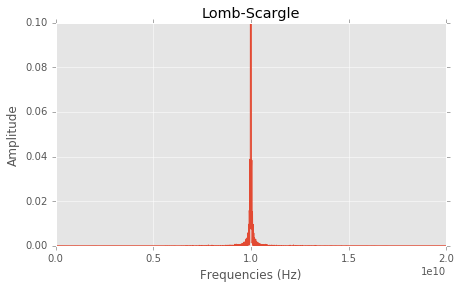

In [33]:
fig1 = plt.figure(figsize=(7, 4))

plt.plot(frequency1600, power1600)
plt.title('Lomb-Scargle')
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.2e11)
plt.ylim(0,0.1)

plt.savefig('lombscargle.png', format='png')

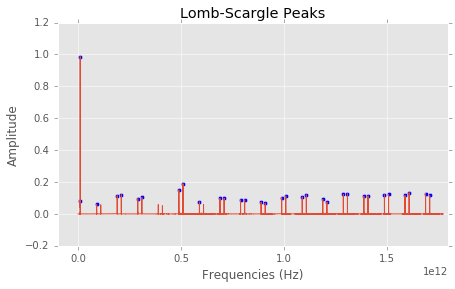

In [10]:
fig1 = plt.figure(figsize=(7, 4))

plt.plot(frequency1000, power1000)
plt.scatter(x_peaks, peaks)
plt.title('Lomb-Scargle Peaks')
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-0.1e12, 1.8e12)

plt.savefig('peaks.png', format='png')

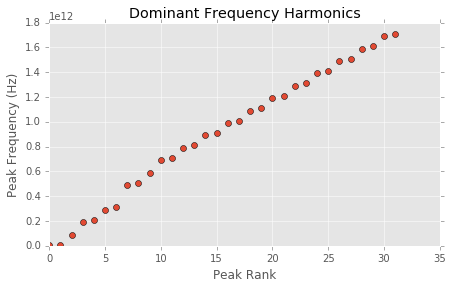

In [11]:
fig1 = plt.figure(figsize=(7, 4))
plt.plot(x_peaks, 'o')
plt.title('Dominant Frequency Harmonics')
plt.ylabel('Peak Frequency (Hz)')
plt.xlabel('Peak Rank')

plt.savefig('harmonics.png', format='png')

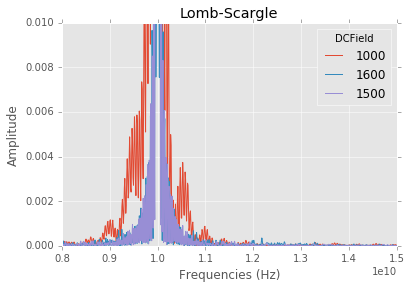

In [39]:
plt.plot(frequency1000, power1000, label = '1000')
plt.plot(frequency1600, power1600, label = '1600')
plt.plot(frequency1500, power1500, label = '1500')
#plt.scatter(x_peaks, peaks)
plt.legend(title= 'DCField')
plt.title('Lomb-Scargle')
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0.8e10, 0.15e11)
plt.ylim(0,0.01)

plt.savefig('zoom.png', format='png')

In [27]:
max_freqs = []

max_freqs.append(frequency800[power800.argmax()])
max_freqs.append(frequency900[power900.argmax()])
max_freqs.append(frequency1000[power1000.argmax()])
max_freqs.append(frequency1100[power1100.argmax()])
max_freqs.append(frequency1200[power1200.argmax()])
max_freqs.append(frequency1300[power1300.argmax()])
max_freqs.append(frequency1400[power1400.argmax()])
max_freqs.append(frequency1400[power1500.argmax()])
max_freqs.append(frequency1400[power1600.argmax()])

freqs = [800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600]

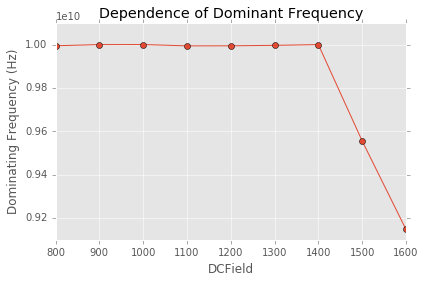

In [38]:
plt.plot(freqs, max_freqs, 'o-')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Dominating Frequency (Hz)')
plt.xlabel('DCField')
plt.title('Dependence of Dominant Frequency', y=1.)
plt.savefig('dependence.png', format = 'png')
plt.tight_layout()

In [7]:
import sys
from numpy import NaN, Inf, arange, isscalar, asarray, array

def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)